#Task 1
1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.

Geom_point and plotnine are being used for data visualization. As for aesthetics, the x variable is Income and the y variable is Life Expectancy. There are four different colors representing the four different regions, and each bubble represents population.

2. Import the q1data.csv dataset.

In [2]:
import pandas as pd
q1 = pd.read_csv("/Users/oscarluo/Documents/GSB-544/Week_1/Data/q1data.csv")

#Show heading
q1.head()

,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,1910.0,61.0,29200000.0,2010,Afghanistan,asia,south_asia,asia_west,South Asia
1,11100.0,78.1,2950000.0,2010,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,11100.0,74.7,36000000.0,2010,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,46900.0,81.9,84500.0,2010,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
4,7680.0,60.8,23400000.0,2010,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


3. Recreate the plot as best you can using plotnine.

/Applications/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


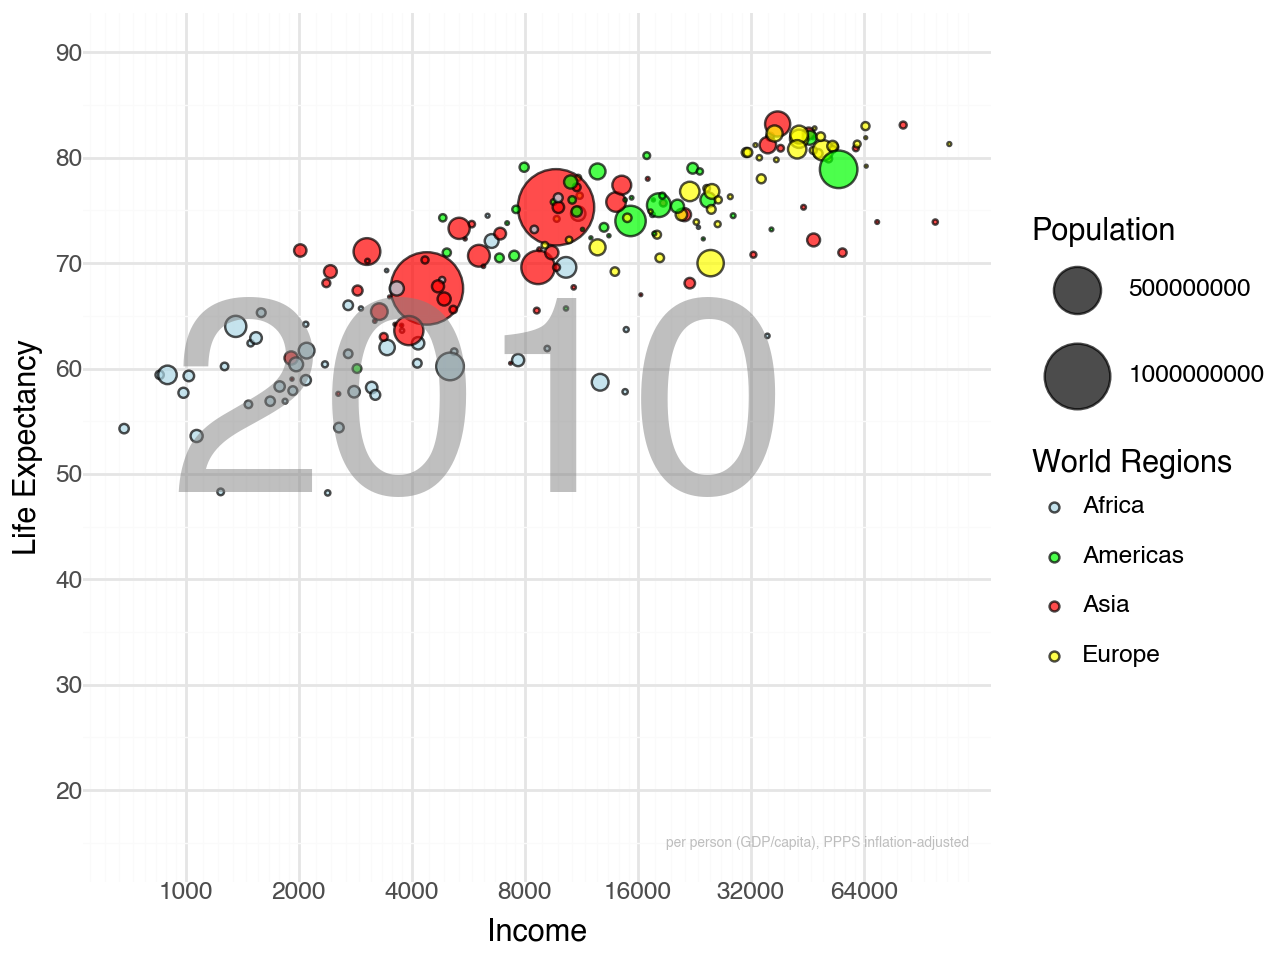

In [46]:
#Import plotnine 
import plotnine as p9

#Clean data 
q1_clean = q1.dropna(subset=["four_regions"])

#Recreate plot
(
    p9.ggplot(q1_clean, 
        p9.aes(
            x = "income", y = "life_exp", fill = "four_regions"
        )
    ) 
    #Bubbles sized by population and changing opacity
    + p9.geom_point(p9.aes(size = "population"), alpha = 0.7)

    #X axis log scale because it is exponential
    + p9.scale_x_log10(breaks = [500, 1000, 2000, 4000, 8000, 16000, 32000, 64000]) 

    #Y axis continuous scale 
    + p9.scale_y_continuous(breaks = [20, 30, 40, 50, 60, 70, 80, 90], limits = (15, 90))

    #Name axes  
    + p9.labs(x = "Income", y = "Life Expectancy", size = "Population", fill = "World Regions")

    #Max size of bubbles  
    + p9.scale_size_area(max_size = 15)

    #Change colors of bubbles
    + p9.scale_fill_manual(["lightblue", "lime", "red", "yellow"], labels = ['Africa', 'Americas', 'Asia', 'Europe'])

    # Change theme and add text
    + p9.theme_minimal()
    + p9.annotate('text', x = 6000, y = 55, label = "2010", alpha = 0.5, size = 100, color = 'gray')
    + p9.annotate('text', x = 48000, y = 15, label = "per person (GDP/capita), PPPS inflation-adjusted", alpha = 0.5, size = 5, color = 'gray')
)

4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.

/Applications/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_text : Removed 1 rows containing missing values.


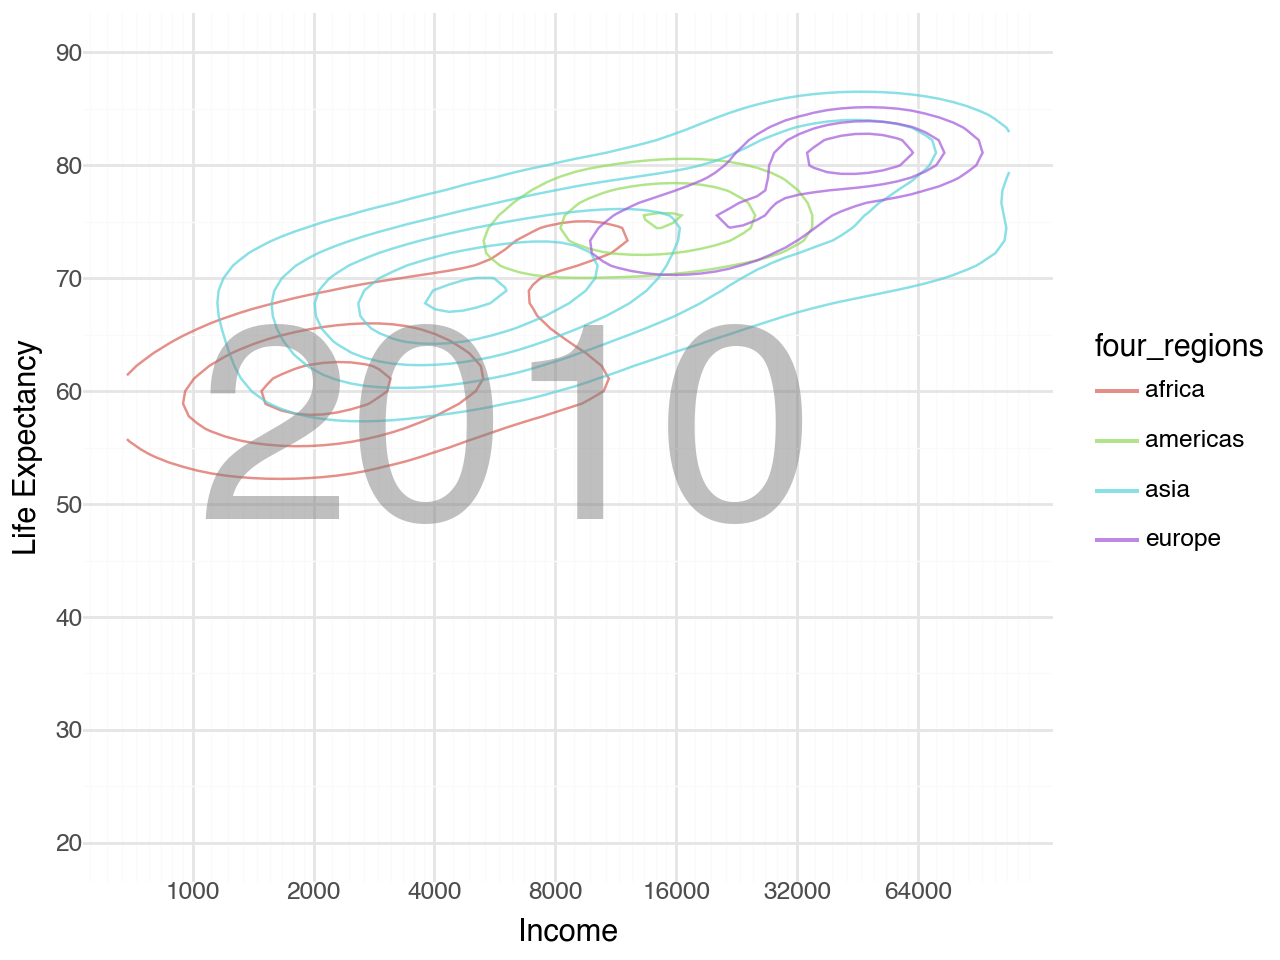

In [47]:
(
    p9.ggplot(q1_clean, 
        p9.aes(
            x = "income", y = "life_exp", fill = "four_regions"
        )
    ) 
    #Density lines colore by region and changing opacity
    + p9.geom_density_2d(p9.aes(color = "four_regions"), alpha = 0.7)

    #X axis log scale because it is exponential
    + p9.scale_x_log10(breaks = [500, 1000, 2000, 4000, 8000, 16000, 32000, 64000]) 

    #Y axis continuous scale limit from 20-90 
    + p9.scale_y_continuous(breaks = [20, 30, 40, 50, 60, 70, 80, 90], limits=(20, 90))

    #Name axes  
    + p9.labs(x = "Income", y = "Life Expectancy")

    # Change theme and add text
    + p9.theme_minimal()
    + p9.annotate('text', x = 6000, y = 55, label = "2010", alpha = 0.5, size = 100, color = 'gray')
    + p9.annotate('text', x = 48000, y = 15, label = "per person (GDP/capita), PPPS inflation-adjusted", alpha = 0.5, size = 5, color = 'gray')
)

#Task 2
1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.
The x variable is Exports and the y variable is Imports. Colors are based on regions and size of the bubbles are based on energy use. Geom_point is being used again.

2. Import the q2data.csv dataset.

In [53]:
import pandas as pd
q2 = pd.read_csv("/Users/oscarluo/Documents/GSB-544/Week_1/Data/q2data.csv")

#Show heading
q2.head()

,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,NaN,NaN,NaN,1997,Afghanistan,asia,south_asia,asia_west,South Asia
1,36.7,11.5,427,1997,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,22.5,22.6,825,1997,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,NaN,NaN,1997,American Samoa,NaN,NaN,NaN,NaN
4,NaN,NaN,434,1997,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


3. Recreate the plot as best you can using plotnine.

In [54]:
#Import plotnine 
import plotnine as p9

#Clean data
q2_clean = q2.dropna()

#Energy values for non float values
q2_clean["energy"].sort_values().unique()

array(['1030', '1060', '1070', '1080', '1170', '12.4k', '1220', '1290', '1340',
       '1400', '142', '1490', '1520', '1570', '1660', '1740', '1790', '1800',
       '1820', '19.3k', '1910', '1950', '2000', '2080', '2170', '2240', '2250',
       '229', '2300', '2390', '2430', '246', '2460', '2470', '2500', '251',
       '2610', '2630', '2710', '2760', '2840', '2890', '2910', '2940', '296',
       '3020', '307', '308', '316', '3250', '3260', '3380', '340', '3420',
       '3560', '3610', '367', '3700', '373', '376', '3770', '378', '3790',
       '381', '396', '3960', '3980', '399', '403', '4060', '408', '4150',
       '4160', '4180', '427', '437', '438', '448', '4650', '4840', '487',
       '493', '504', '5080', '535', '551', '5550', '5600', '563', '5680',
       '5770', '579', '610', '617', '621', '627', '629', '630', '6320', '666',
       '688', '7070', '716', '717', '725', '7290', '749', '750', '7800', '786',
       '7950', '825', '844', '845', '869', '883', '897', '901', '9040', '9170

In [55]:
# Replace k with e3, which is * 1000
q2_clean['energy'] = q2_clean['energy'].replace({'k': 'e3'}, regex=True).astype(float)

# Display the cleaned 'energy' column
q2_clean['energy'].sort_values().unique()

<positron-console-cell-55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


array([  142.,   229.,   246.,   251.,   296.,   307.,   308.,   316.,   340.,
         367.,   373.,   376.,   378.,   381.,   396.,   399.,   403.,   408.,
         427.,   437.,   438.,   448.,   487.,   493.,   504.,   535.,   551.,
         563.,   579.,   610.,   617.,   621.,   627.,   629.,   630.,   666.,
         688.,   716.,   717.,   725.,   749.,   750.,   786.,   825.,   844.,
         845.,   869.,   883.,   897.,   901.,   943.,   951.,   991.,  1030.,
        1060.,  1070.,  1080.,  1170.,  1220.,  1290.,  1340.,  1400.,  1490.,
        1520.,  1570.,  1660.,  1740.,  1790.,  1800.,  1820.,  1910.,  1950.,
        2000.,  2080.,  2170.,  2240.,  2250.,  2300.,  2390.,  2430.,  2460.,
        2470.,  2500.,  2610.,  2630.,  2710.,  2760.,  2840.,  2890.,  2910.,
        2940.,  3020.,  3250.,  3260.,  3380.,  3420.,  3560.,  3610.,  3700.,
        3770.,  3790.,  3960.,  3980.,  4060.,  4150.,  4160.,  4180.,  4650.,
        4840.,  5080.,  5550.,  5600.,  5680.,  5770

<positron-console-cell-66>:23: SyntaxWarning: invalid escape sequence '\%'
<positron-console-cell-66>:23: SyntaxWarning: invalid escape sequence '\%'
/Applications/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 92 rows containing missing values.


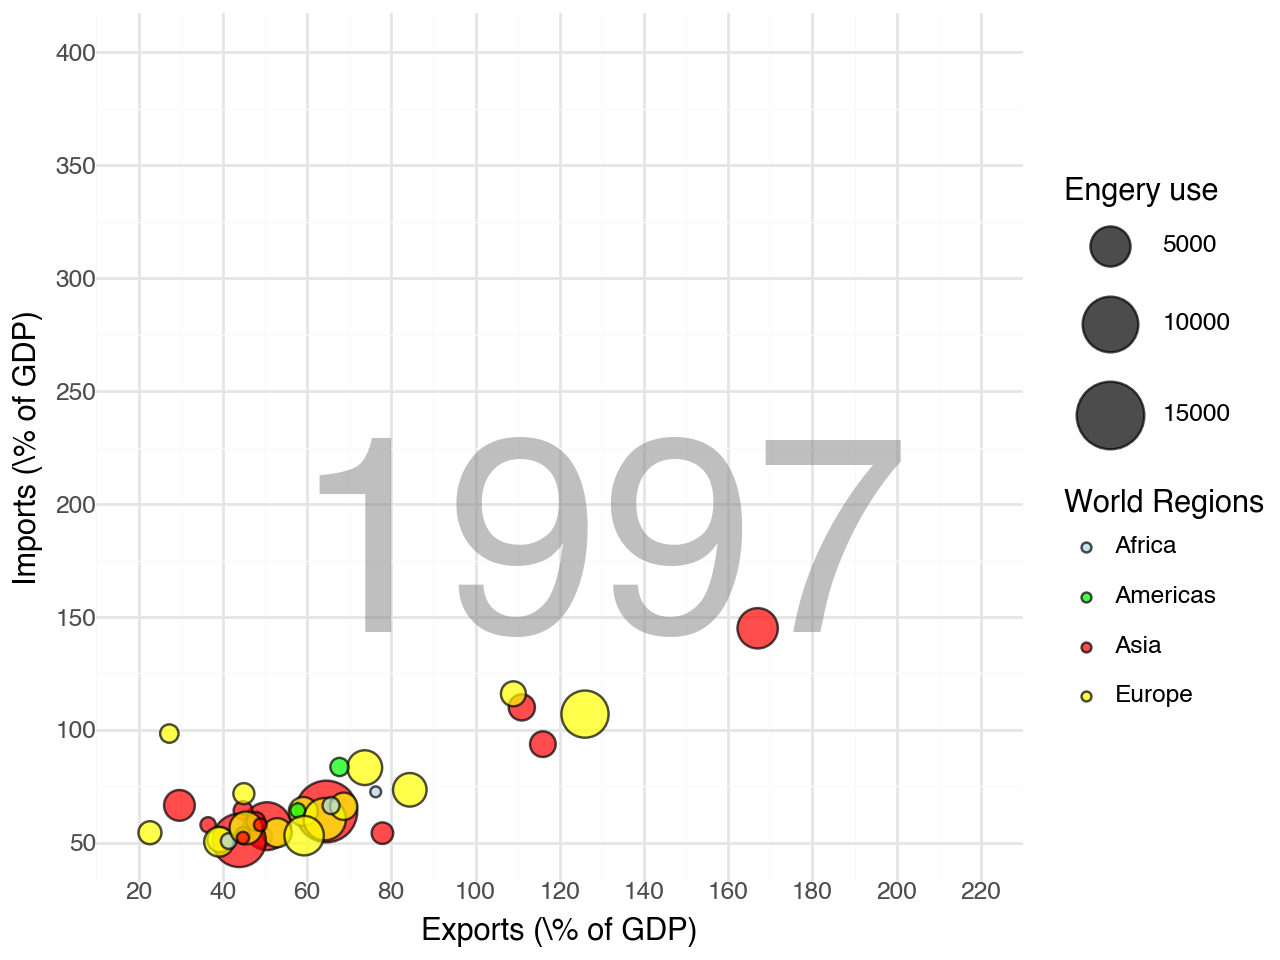

In [66]:
#Recreate plot
(
    p9.ggplot(q2_clean,
    p9.aes(x = "exports", y = "imports", fill = "four_regions"
    ))

    # Bubble sized by energy and changing opacity
    + p9.geom_point(p9.aes(size = "energy"), alpha = 0.7)

    #Max size of bubbles
    + p9.scale_size_area(max_size = 15)

    # X Axis
    + p9.scale_x_continuous(breaks=[20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220], limits = (20, 220))

    #Y Axis
    + p9.scale_y_continuous(breaks = [50, 100, 150, 200, 250, 300, 350, 400], limits = (50,400))

    #Change colors of bubbles
    + p9.scale_fill_manual(["lightblue", "lime", "red", "yellow"], labels = ['Africa', 'Americas', 'Asia', 'Europe'])

    #Label Axes
    + p9.labs(x="Exports (\% of GDP)", y="Imports (\% of GDP)", size="Engery use", fill="World Regions")

    # Change theme and ddd 1997 text
    + p9.theme_minimal()
    + p9.annotate('text', x = 130, y = 175, label = "1997", alpha = 0.5, size = 100, color = 'gray')
    )


4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.

<positron-console-cell-67>:19: SyntaxWarning: invalid escape sequence '\%'
<positron-console-cell-67>:19: SyntaxWarning: invalid escape sequence '\%'
/Applications/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_ydensity : Removed 92 rows containing non-finite values.


/Applications/anaconda3/lib/python3.12/site-packages/plotnine/positions/position.py:232: PlotnineWarning: position_dodge requires non-overlapping x intervals


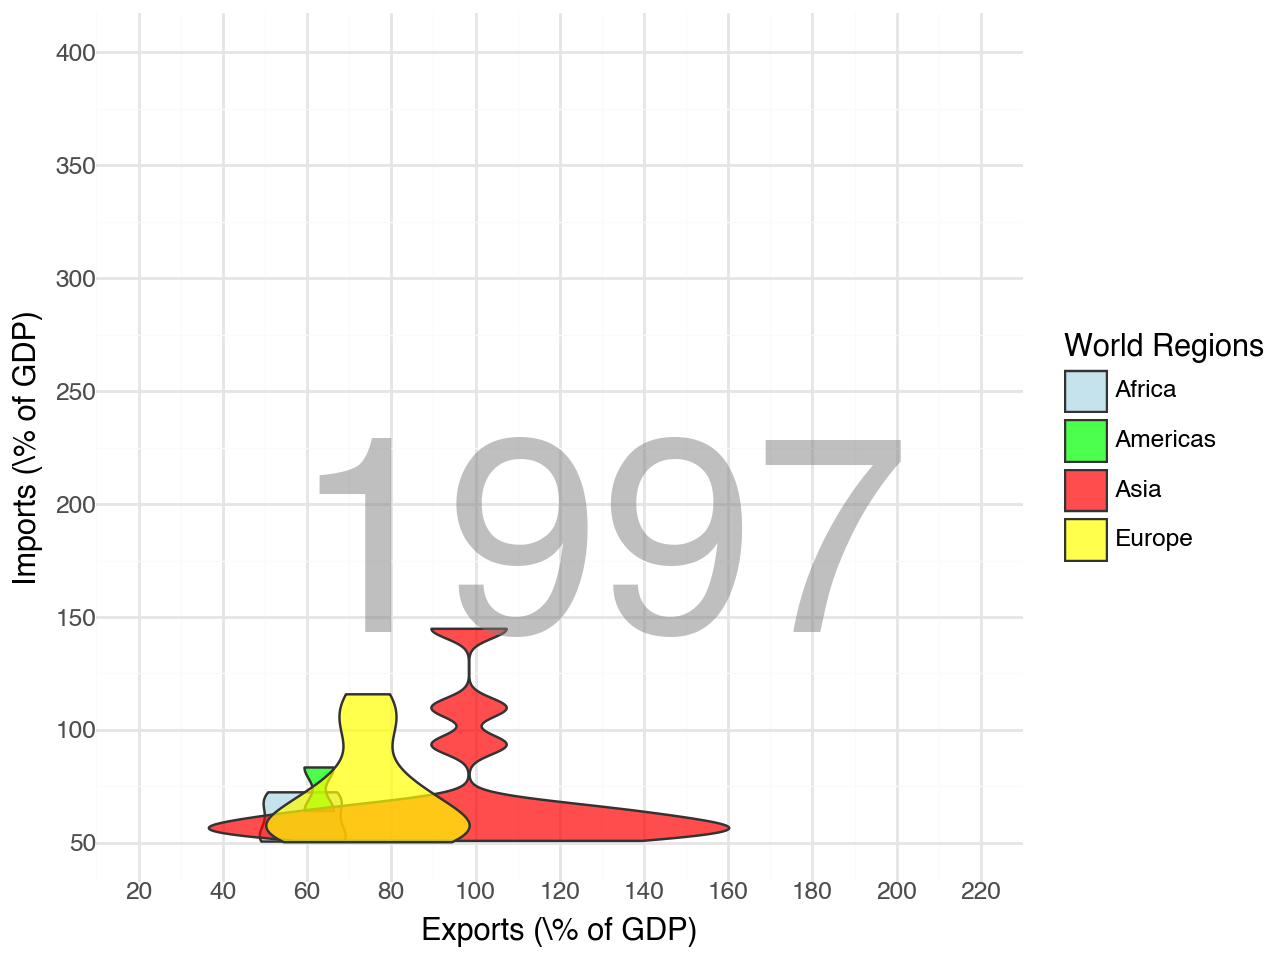

In [67]:
(
    p9.ggplot(q2_clean,
    p9.aes(x = "exports", y = "imports", fill = "four_regions"
    ))

    # Violin plot with energy as size changing opacity
    + p9.geom_violin(p9.aes(size = "energy"), alpha = 0.7)

    # X Axis
    + p9.scale_x_continuous(breaks=[20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220], limits = (20, 220))

    #Y Axis
    + p9.scale_y_continuous(breaks = [50, 100, 150, 200, 250, 300, 350, 400], limits = (50,400))

    #Change colors of bubbles
    + p9.scale_fill_manual(["lightblue", "lime", "red", "yellow"], labels = ['Africa', 'Americas', 'Asia', 'Europe'])

    #Label Axes
    + p9.labs(x="Exports (\% of GDP)", y="Imports (\% of GDP)", size="Engery use", fill="World Regions")

    # Change theme and ddd 1997 text
    + p9.theme_minimal()
    + p9.annotate('text', x = 130, y = 175, label = "1997", alpha = 0.5, size = 100, color = 'gray')
    )

#Task 3
1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic. 
The x variable is Individuals using internet and the y variable is GDP/capita. The size of the bubbles are based on Income and the colors are based on the region.

2. Import the q3data.csv dataset.

In [12]:
import pandas as pd
q3 = q3 = pd.read_csv("/Users/oscarluo/Documents/GSB-544/Week_1/Data/q3data.csv")

#Show heading
q3.head()

,internet_users,gdp,income,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,0.00456,330.0,1190.0,2001,Afghanistan,asia,south_asia,asia_west,South Asia
1,0.39000,2570.0,6780.0,2001,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,1.59000,3770.0,9230.0,2001,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,10500.0,NaN,2001,American Samoa,NaN,NaN,NaN,NaN
4,11.30000,42600.0,35600.0,2001,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia


3. Recreate the plot as best you can using plotnine.

<positron-console-cell-70>:30: SyntaxWarning: invalid escape sequence '\%'
/Applications/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 118 rows containing missing values.


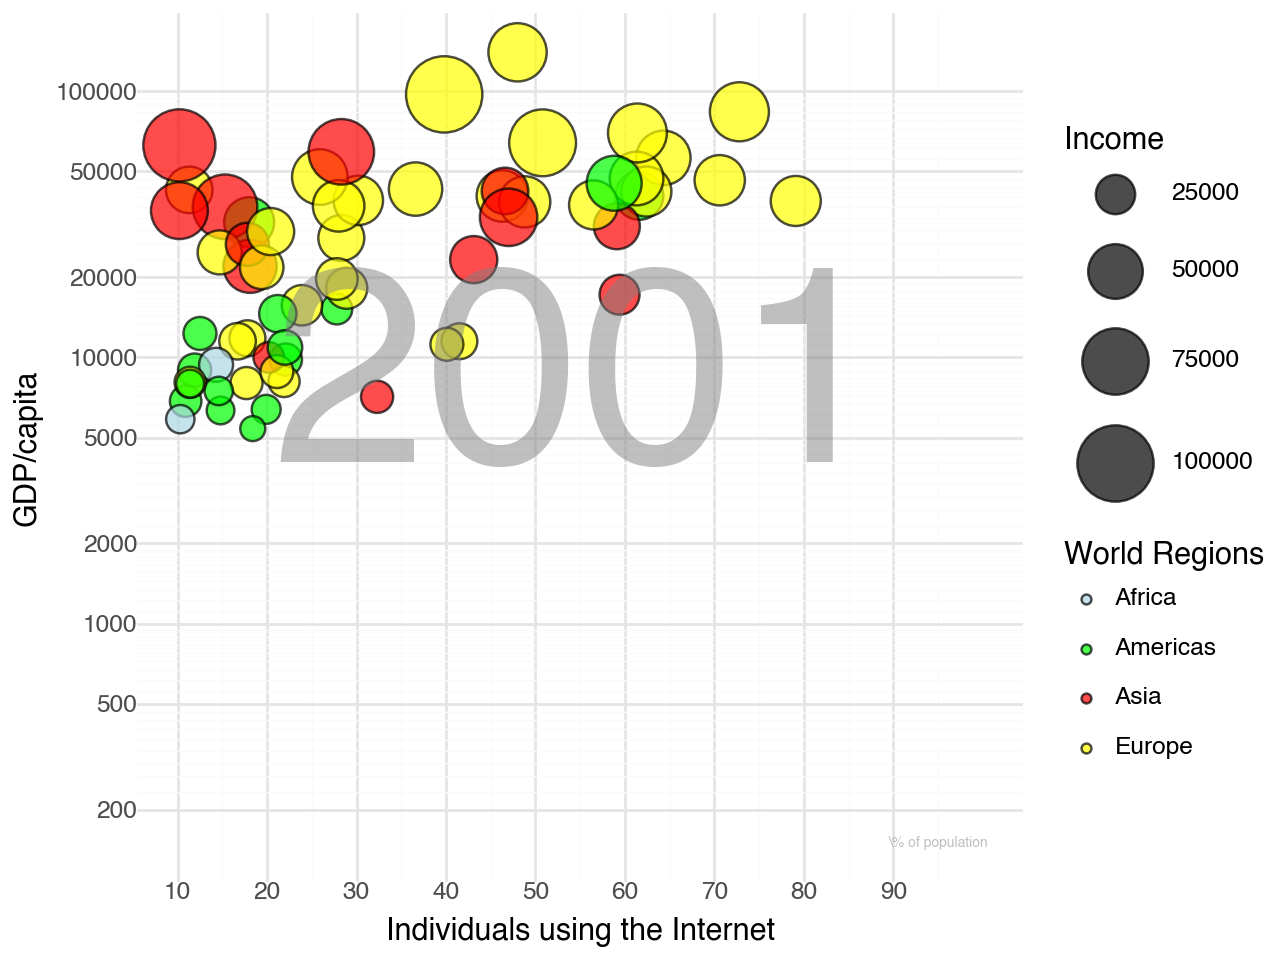

In [70]:
#Clean data 
q3_clean = q3.dropna()

#Recreate plot
(
    p9.ggplot(q3_clean,
    p9.aes(x = 'internet_users', y = 'gdp', fill = 'four_regions'))

    #Bubble plot and size = income
     + p9.geom_point(p9.aes(size = "income"), alpha = 0.7)

    #Bubble sizes 
    + p9.scale_size_area(max_size = 15)

    #X axis scale
    + p9.scale_x_continuous(breaks = [10, 20, 30, 40, 50, 60, 70, 80, 90], limits = (10,100))

    #Y axis scale
    +p9.scale_y_log10(breaks = [200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000])

    #Label axes
    + p9.labs(x="Individuals using the Internet", y="GDP/capita", size="Income", fill="World Regions")

    #Bubble colors
    + p9.scale_fill_manual(["lightblue", "lime", "red", "yellow"], labels = ['Africa', 'Americas', 'Asia', 'Europe'])

    # Change theme and add 2001 text
    + p9.theme_minimal()
    + p9.annotate('text', x = 55, y = 7500, label = "2001", alpha = 0.5, size = 100, color = 'gray')
    + p9.annotate ('text', x = 95, y = 150, label = '\% of population', alpha = 0.5, size = 5, color = 'gray')
)

4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.

<positron-console-cell-73>:23: SyntaxWarning: invalid escape sequence '\%'
/Applications/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 118 rows containing non-finite values.


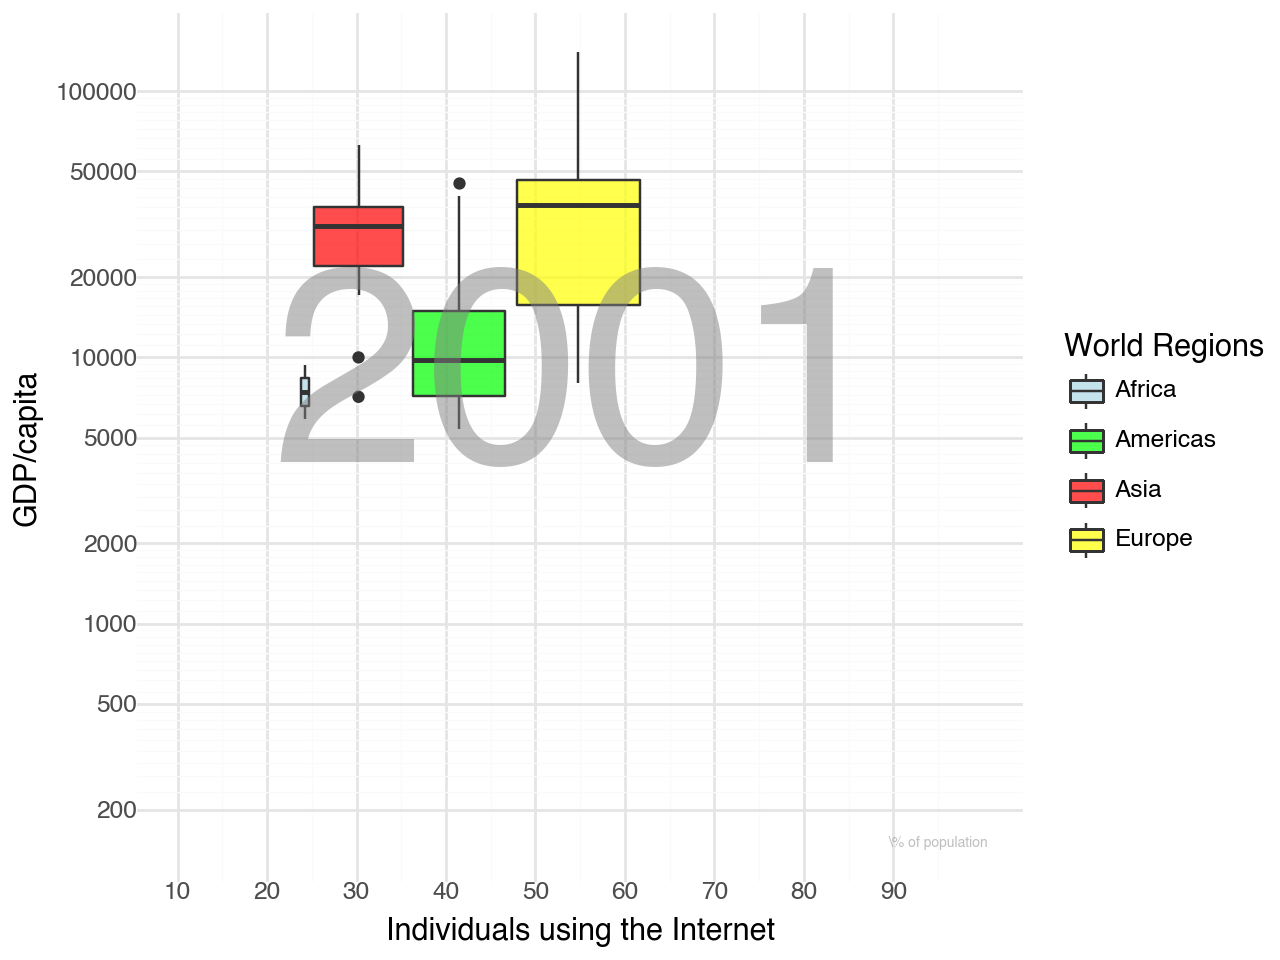

In [73]:
(
    p9.ggplot(q3_clean,
    p9.aes(x = 'internet_users', y = 'gdp', fill = 'four_regions'))

    #Bubble plot and size = income
     + p9.geom_boxplot(p9.aes(size = "income"), alpha = 0.7)

    #X axis scale
    + p9.scale_x_continuous(breaks = [10, 20, 30, 40, 50, 60, 70, 80, 90], limits = (10,100))

    #Y axis scale
    +p9.scale_y_log10(breaks = [200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000])

    #Label axes
    + p9.labs(x="Individuals using the Internet", y="GDP/capita", size="Income", fill="World Regions")

    #Bubble colors
    + p9.scale_fill_manual(["lightblue", "lime", "red", "yellow"], labels = ['Africa', 'Americas', 'Asia', 'Europe'])

    # Change theme and add 2001 text
    + p9.theme_minimal()
    + p9.annotate('text', x = 55, y = 7500, label = "2001", alpha = 0.5, size = 100, color = 'gray')
    + p9.annotate ('text', x = 95, y = 150, label = '\% of population', alpha = 0.5, size = 5, color = 'gray')
)